In [1]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import math
import numpy as np
from scipy import stats as st
from IPython.display import Image
import seaborn as sns

%autosave 5

Autosaving every 5 seconds


In [3]:
df.corr()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.columns = df.columns.str.lower()

In [6]:
# Пока оценка пользователей вообще строковая. Первые две замены типов необязательны, в отличие от оценки:

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [13]:
df.dropna(subset = ['year_of_release'], inplace = True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['na_sales'] = df['na_sales'].astype(int)
df['eu_sales'] = df['eu_sales'].astype(int)
df['jp_sales'] = df['jp_sales'].astype(int)
df['other_sales'] = df['other_sales'].astype(int)

## Исследовательский анализ данных


Text(0, 0.5, 'Встречаемость')

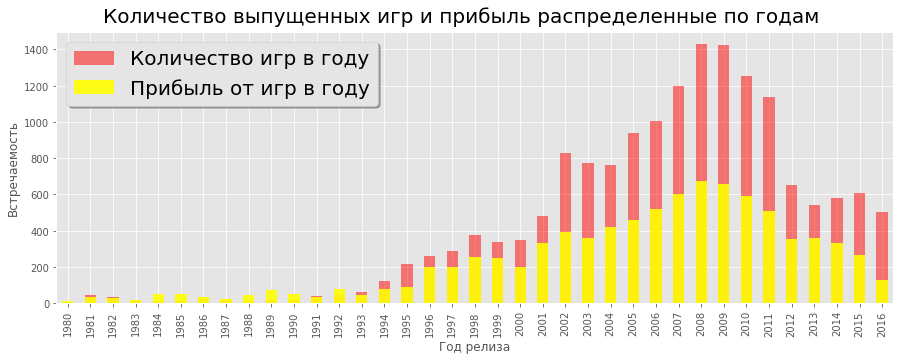

In [72]:
plt.figure(figsize=(15, 5)).suptitle('Количество выпущенных игр и прибыль распределенные по годам', fontsize=20, y=0.95, x=0.5)

df.groupby('year_of_release')['total_profit'].count().plot( kind='bar', color='red' , alpha=0.5, label='Количество игр в году')
df.groupby('year_of_release')['total_profit'].sum().plot( kind='bar', color='yellow', alpha=0.9, label='Прибыль от игр в году')
plt.legend(shadow = True, fontsize = 20)

plt.xlabel('Год релиза')
plt.ylabel('Встречаемость')

На графике видны два тренда : до 2008-2009 года восходящий, после 2008-2009 - нисходящий. При этом внутри временного промежутка 2008-2009 - 2016 тоже есть условно два своих тренда. В 2012м году игр стало выпускаться резко меньше, а суммарная прибыль упала не слишком сильно. Это значит, что игры 2012-2016 годов в среднем сильно прибыльнее, чем игры 2009-2012, в связи с чем считаю правильным принять за актуальный период отрезок 2012-2016

Text(0, 0.5, 'млн $')

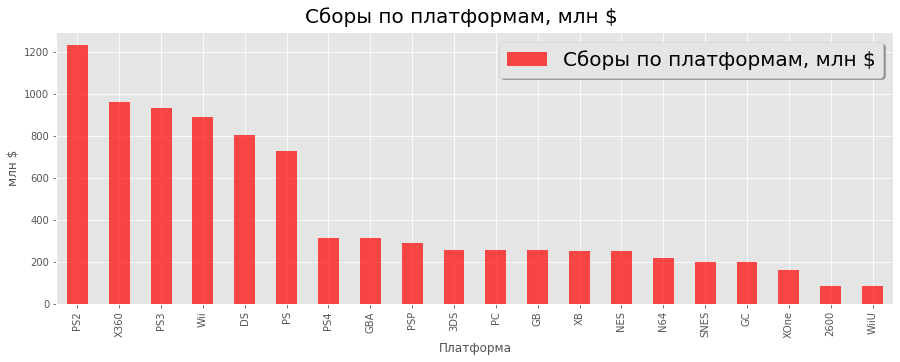

In [81]:
plt.figure(figsize=(15, 5)).suptitle('Сборы по платформам, млн $', fontsize=20, y=0.95, x=0.5)


df.groupby('platform')['total_profit'].sum().sort_values(ascending=False).head(20).plot(kind='bar', alpha=0.7, color='red', label='Сборы по платформам, млн $')
plt.legend(shadow = True, fontsize = 20)
plt.xlabel('Платформа')
plt.ylabel('млн $')

In [23]:
years_platforms_profit = pd.DataFrame(df.groupby(['year_of_release', 'platform'])['total_profit'].sum())

In [24]:
years_platforms_profit = years_platforms_profit.query('platform == "PS2" | platform =="X360" | platform == "PS3" | platform =="Wii" | platform == "DS" | platform =="PS"').reset_index()

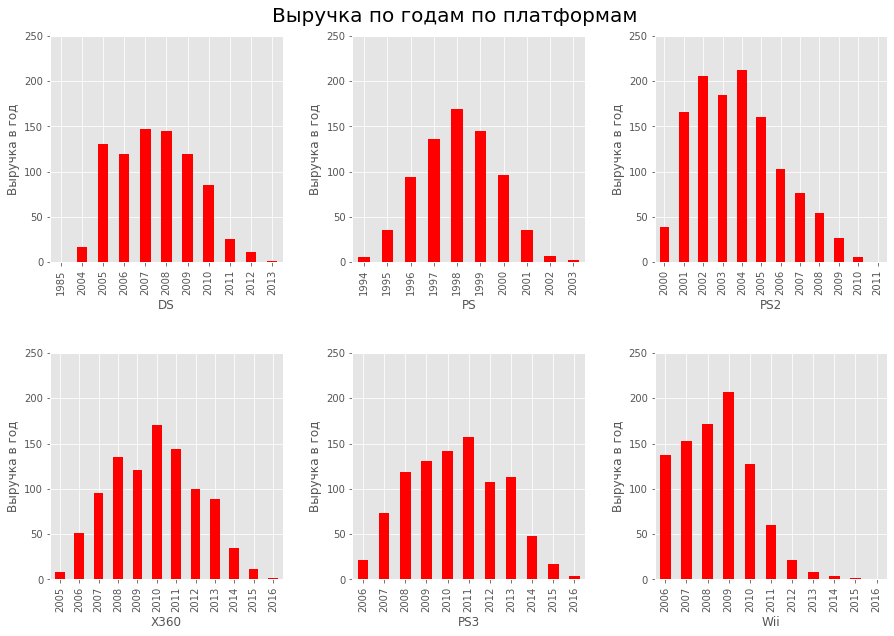

In [74]:
plt.figure(figsize=(15, 10)).suptitle('Выручка по годам по платформам', fontsize=20, y=0.92, x=0.5)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

def test(i, plat):
    plt.subplot(2, 3, i)
    years_platforms_profit.query('platform == @plat').groupby('year_of_release')['total_profit'].sum().plot( kind='bar', color='red')
    plt.xlabel(plat)
    plt.ylabel('Выручка в год')
    plt.ylim(0, 250)

def test1():
    i = 1
    for word in years_platforms_profit['platform'].unique():
        test(i, word)
        i += 1
        
test1()

В среднем набирают популярность игры 4 года, держатся на рынке и пропадают в течение 5 лет

На графике видны два тренда : до 2008-2009 года восходящий, после 2008-2009 - нисходящий. При этом внутри временного промежутка 2008-2009 - 2016 тоже есть условно два своих тренда. В 2012м году игр стало выпускаться резко меньше, а суммарная прибыль упала не слишком сильно. Это значит, что игры 2012-2016 годов в среднем сильно прибыльнее, чем игры 2009-2012.

**Чтобы это учесть, в качестве актуального периода возьмём промежуток 2012-2016**


## Анализ данных за 2012-2016 годы

In [27]:
actual_data = df.query('year_of_release >= 2012')

In [28]:
actual_platforms = pd.DataFrame(actual_data.groupby(['platform','year_of_release'])['total_profit'].sum()).reset_index(drop=False)

In [75]:
def print_actual_platforms(i, plat):
    plt.subplot(4, 3, i)
    actual_platforms.query('platform == @plat').groupby('year_of_release')['total_profit'].sum().plot( kind='bar', color='red')
    plt.xlabel(plat)
    plt.ylabel('Сборы, млн $')
    plt.ylim(0, 120)
def def_for_print_actual_platforms():
    i = 1
    for word in actual_platforms['platform'].unique():
        print_actual_platforms(i, word)
        i += 1

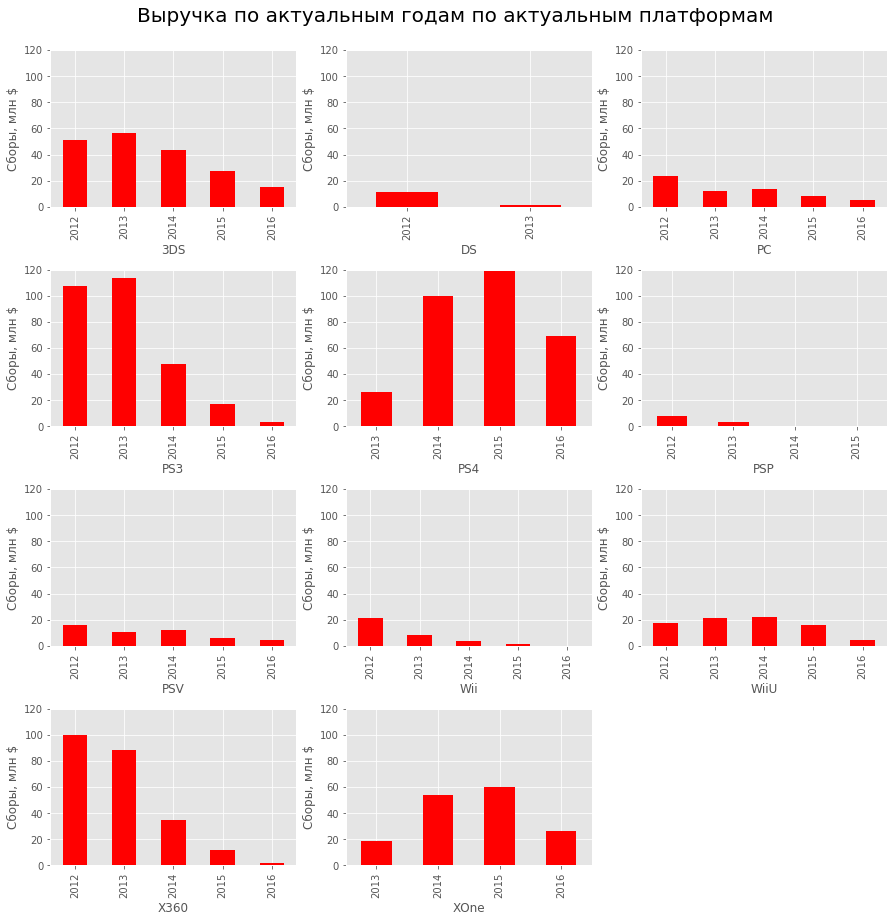

In [76]:
plt.figure(figsize=(15, 15)).suptitle('Выручка по актуальным годам по актуальным платформам', fontsize=20, y=0.92, x=0.5)
plt.subplots_adjust(hspace=0.4)


def_for_print_actual_platforms()

Text(0.5, 1, 'Значения, воспринимаемые боксплотом как выбросы')

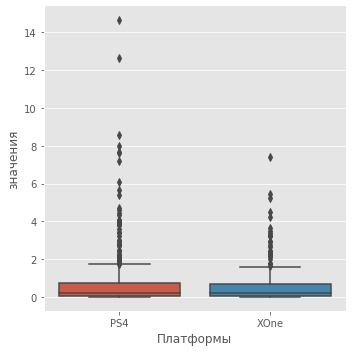

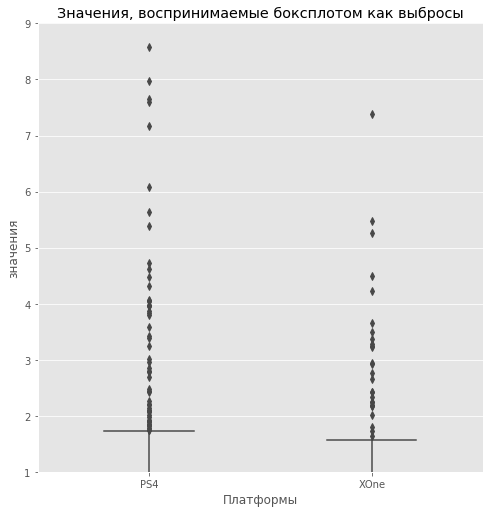

In [32]:
sns.catplot(x='platform', y='total_profit', data=actual_data_actual_platforms, kind='box', height=5)
plt.xlabel('Платформы')
plt.ylabel('значения')

sns.catplot(x='platform', y='total_profit', data=actual_data_actual_platforms, kind='box', height=7)
plt.ylim(1, 9)
plt.xlabel('Платформы')
plt.ylabel('значения')
plt.title('Значения, воспринимаемые боксплотом как выбросы')

**Вывод по боксплотам.**

Во-первых, стоит сказать, что выручку стоит распределить условно на два типа - это совсем далекие выбросы, то есть невероятно прибыльные игры и большинство игр. Рассматривать боксплоты будем в соответствии с этой градацией.

1. Если анализировать наиболее далекие выбросы, обозначающие крайне успешные игры, их больше у PS4. Однако полагаться на них рискованно - в штуках их у PS4 две, а у XOne - 1. А рассматриваем мы больше двух тысяч игр, и в их распределении три крайне успешные игры очень легко теряются
2. Виду этого более рационально смотреть на распределение большинства игр. И, судя по самому ящику с усами, выручка у PS4 несильно, но больше выручки на XOne и это важно учесть - такое распределение актуально для *большинства* игр, а значит, скорее всего случится и с выходом новых игр и дальше

Медианы примерно равны, а вот среднее арифметическое больше у PS4 на 24%. 

Учитывая и распределение большинства игр и выбросов, платформа PS4 становится более приоритетной. 

In [34]:
actual_data_PS4 = actual_data.query('platform =="PS4"')[['platform', 'critic_score', 'user_score', 'total_profit']]
actual_data_PS4.dropna(subset = ['critic_score'], inplace=True)
actual_data_PS4.info()

actual_data_PS4['critic_score'] = round(actual_data_PS4['critic_score'],-1)
actual_data_PS4['user_score'] = round(actual_data_PS4['user_score'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 42 to 16530
Data columns (total 4 columns):
platform        252 non-null object
critic_score    252 non-null float64
user_score      249 non-null float64
total_profit    252 non-null float64
dtypes: float64(3), object(1)
memory usage: 9.8+ KB


Text(9.924999999999997, 0.5, 'Прибыль')

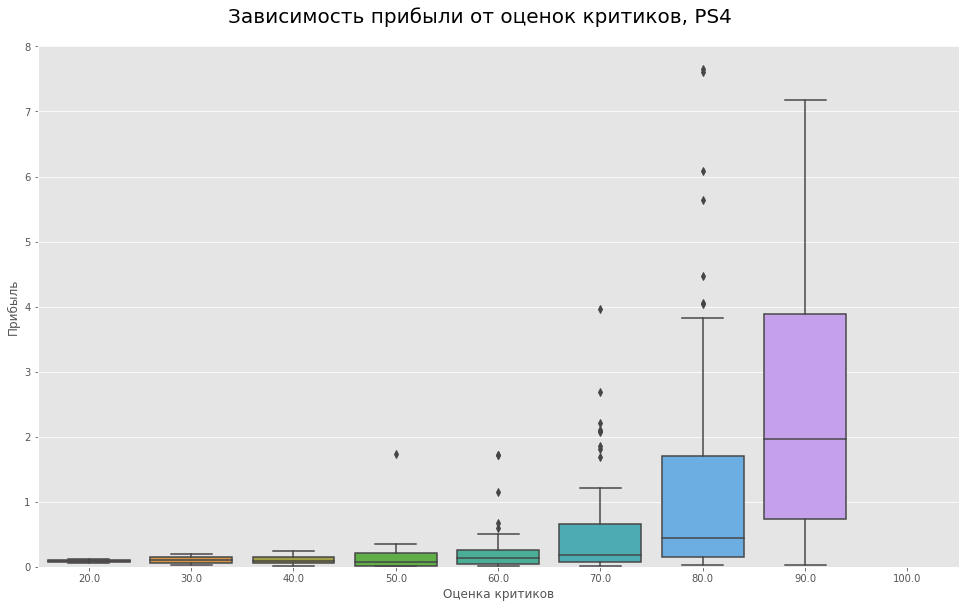

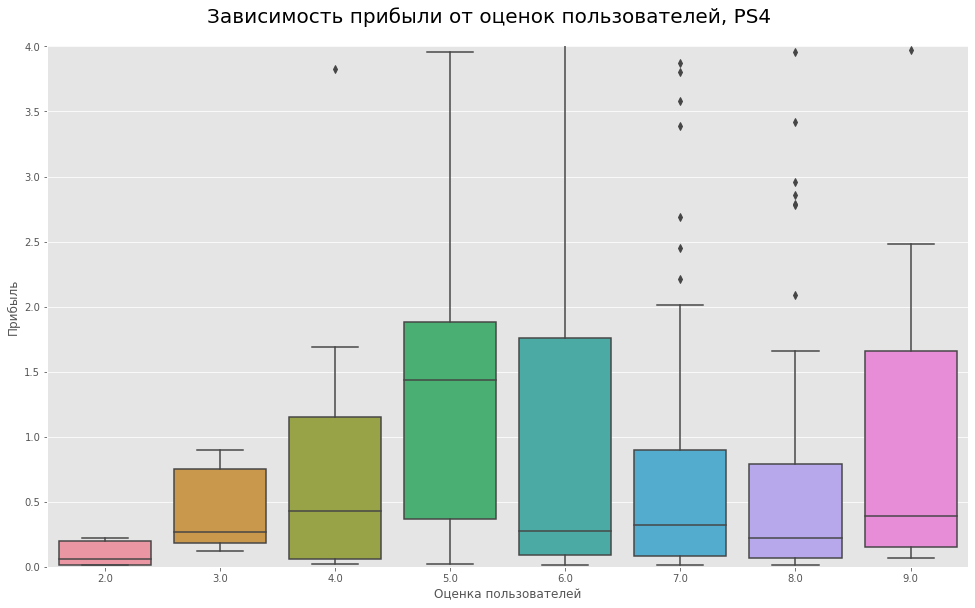

In [35]:
sns.catplot(x='critic_score', y='total_profit', data=actual_data_PS4, kind='box', aspect=1.7, height=8).fig.suptitle('Зависимость прибыли от оценок критиков, PS4', fontsize=20, y=1.05 , x=0.5)
plt.ylim(0, 8)
plt.xlabel('Оценка критиков')
plt.ylabel('Прибыль')

sns.catplot(x='user_score', y='total_profit', data=actual_data_PS4, kind='box', aspect=1.7, height=8).fig.suptitle('Зависимость прибыли от оценок пользователей, PS4', fontsize=20, y=1.05 , x=0.5)
plt.ylim(0, 4,5)
plt.xlabel('Оценка пользователей')
plt.ylabel('Прибыль')

In [77]:
print('Корреляция между оценками пользователей и стоимостью =', actual_data_PS4['user_score'].corr(actual_data_PS4['total_profit']), 'взаимосвязь отсутствует')
print('Корреляция между оценками критиков и стоимостью =', actual_data_PS4['critic_score'].corr(actual_data_PS4['total_profit']), 'взаимосвязь положительная, слабая')

Корреляция между оценками пользователей и стоимостью = -0.05285529781830357 взаимосвязь отсутствует
Корреляция между оценками критиков и стоимостью = 0.38845530110048737 взаимосвязь положительная, слабая


In [37]:
print('Корреляция между оценками критиков и стоимостью, где оценка >=70 =', actual_data_PS4.query('critic_score >= 70')['critic_score'].corr(actual_data_PS4.query('critic_score >= 70')['total_profit']), 'взаимосвязь положительная, слабая')

Корреляция между оценками критиков и стоимостью, где оценка >=70 = 0.4178820781573044 взаимосвязь положительная, слабая


Для PS4:

1. Разница в выручке при оценке критиков до 70 существенно не различаются
2. Если оценка критиков от 70, то чем она больше, тем больше игра приносит прибыли, хотя корреляция по Пирсону не сильно отличается от корреляции по всем оценкам критиков
3. Корреляции между оценками пользователей и выручкой просто нет, её даже отрицательной слабой назвать крайне сложно. 

ДЛЯ XONE:

In [38]:
actual_data_XOne = actual_data.query('platform =="XOne"')[['platform', 'critic_score', 'user_score', 'total_profit']]
actual_data_XOne.dropna(subset = ['critic_score'], inplace=True)
actual_data_XOne.info()

actual_data_XOne['critic_score'] = round(actual_data_XOne['critic_score'],-1)
actual_data_XOne['user_score'] = round(actual_data_XOne['user_score'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 165 to 16660
Data columns (total 4 columns):
platform        169 non-null object
critic_score    169 non-null float64
user_score      165 non-null float64
total_profit    169 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.6+ KB


Text(16.299999999999997, 0.5, 'Прибыль')

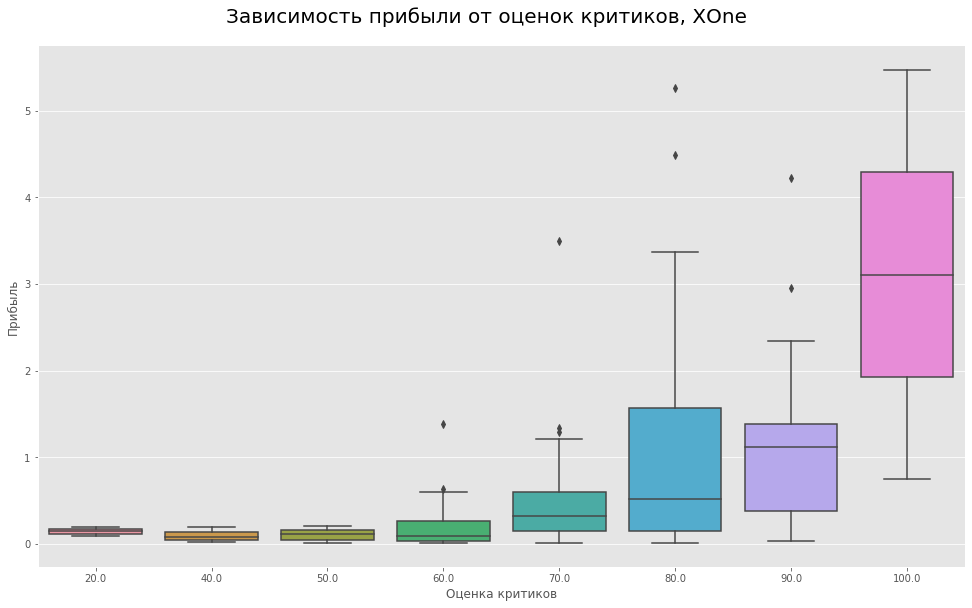

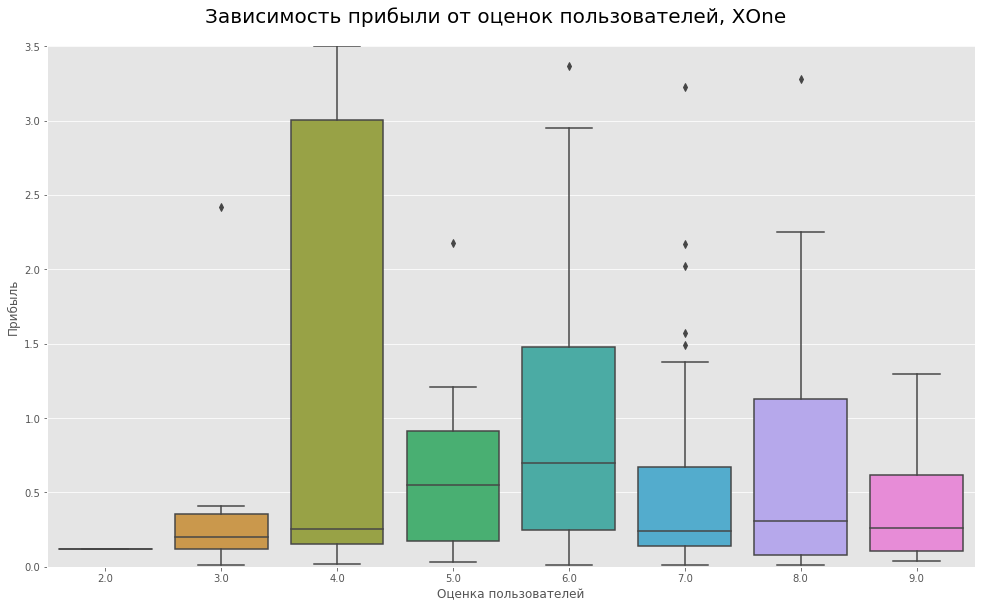

In [39]:
sns.catplot(x='critic_score', y='total_profit', data=actual_data_XOne, kind='box', aspect=1.7, height=8).fig.suptitle('Зависимость прибыли от оценок критиков, XOne', fontsize=20, y=1.05 , x=0.5)
plt.xlabel('Оценка критиков')
plt.ylabel('Прибыль')

sns.catplot(x='user_score', y='total_profit', data=actual_data_XOne, kind='box', aspect=1.7, height=8).fig.suptitle('Зависимость прибыли от оценок пользователей, XOne', fontsize=20, y=1.05 , x=0.5)
plt.ylim(0, 3.5)
plt.xlabel('Оценка пользователей')
plt.ylabel('Прибыль')

In [40]:
print('Корреляция между оценками пользователей и стоимостью', actual_data_XOne['user_score'].corr(actual_data_XOne['total_profit']), 'взаимосвязь отрицательная, слабая')
print('Корреляция между оценками критиков и стоимостью', actual_data_XOne['critic_score'].corr(actual_data_XOne['total_profit']), 'взаимосвязь положительная, слабая')

Корреляция между оценками пользователей и стоимостью -0.1069648304783788 взаимосвязь отрицательная, слабая
Корреляция между оценками критиков и стоимостью 0.3956969852663961 взаимосвязь положительная, слабая


In [41]:
print('Корреляция между оценками критиков и стоимостью, где оценка >=70 =', actual_data_XOne.query('critic_score >= 70')['critic_score'].corr(actual_data_XOne.query('critic_score >= 70')['total_profit']), 'взаимосвязь положительная, слабая')

Корреляция между оценками критиков и стоимостью, где оценка >=70 = 0.2998266789388778 взаимосвязь положительная, слабая


Для XOne:

1. Разница в выручке при оценке критиков до 70 существенно не различаются
2. Если оценка критиков от 70, то чем она больше, тем больше игра приносит прибыли, хотя корреляция по Пирсону уменьшилась на треть. 
3. Корреляции между оценками пользователей и выручкой также нет. 

Примечательно, что корреляции между оценками пользователей и выручкой на обеих платформах разные и отличаются в два раза, а корреляции между оценками **критиков** и выручкой невероятно близки.

Корреляция между оценками пользователей и стоимостью 0.20486578974237185 взаимосвязь положительная, слабая
Корреляция между оценками критиков и стоимостью 0.35546691570185895 взаимосвязь положительная, слабая


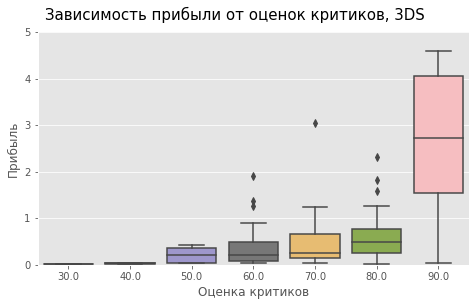

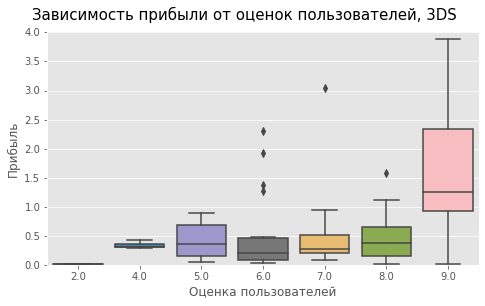

In [42]:
actual_data_3DS = actual_data.query('platform =="3DS"')[['platform', 'critic_score', 'user_score', 'total_profit']]
actual_data_3DS.dropna(subset = ['critic_score'], inplace=True)
actual_data_3DS['critic_score'] = round(actual_data_3DS['critic_score'],-1)
actual_data_3DS['user_score'] = round(actual_data_3DS['user_score'])

sns.catplot(x='critic_score', y='total_profit', data=actual_data_3DS, kind='box', aspect=1.7, height=4).fig.suptitle('Зависимость прибыли от оценок критиков, 3DS', fontsize=15, y=1.05 , x=0.5)
plt.xlabel('Оценка критиков')
plt.ylabel('Прибыль')
plt.ylim(0, 5)

sns.catplot(x='user_score', y='total_profit', data=actual_data_3DS, kind='box', aspect=1.7, height=4).fig.suptitle('Зависимость прибыли от оценок пользователей, 3DS', fontsize=15, y=1.05 , x=0.5)
plt.ylim(0, 4)
plt.xlabel('Оценка пользователей')
plt.ylabel('Прибыль')


print('Корреляция между оценками пользователей и стоимостью', actual_data_3DS['user_score'].corr(actual_data_3DS['total_profit']), 'взаимосвязь положительная, слабая')
print('Корреляция между оценками критиков и стоимостью', actual_data_3DS['critic_score'].corr(actual_data_3DS['total_profit']), 'взаимосвязь положительная, слабая')

В данном случае выручка начинает расти с оценки 50, а не с 70, однако этого недостаточно, чтобы воспринимать платформу 3DS как актуальную

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [43]:
actual_data.query('platform=="PS4" | platform=="XOne"').groupby('genre')['total_profit'].sum().sort_values(ascending=False)

genre
Shooter         148.89
Action          133.41
Sports           82.35
Role-Playing     39.54
Racing           21.93
Misc             15.62
Fighting         11.10
Adventure         9.02
Platform          8.62
Simulation        1.92
Strategy          1.04
Puzzle            0.02
Name: total_profit, dtype: float64

Два крайне прибыльных жанра - шутер и экшн, потом - спортивные игры. Наименее прибыльный жанр - пазлы, отличающийся по выручке в 52 раза в сравнении со вторым по наименьшей прибыльностью - стратегиями.

Text(0, 0.5, 'млн $')

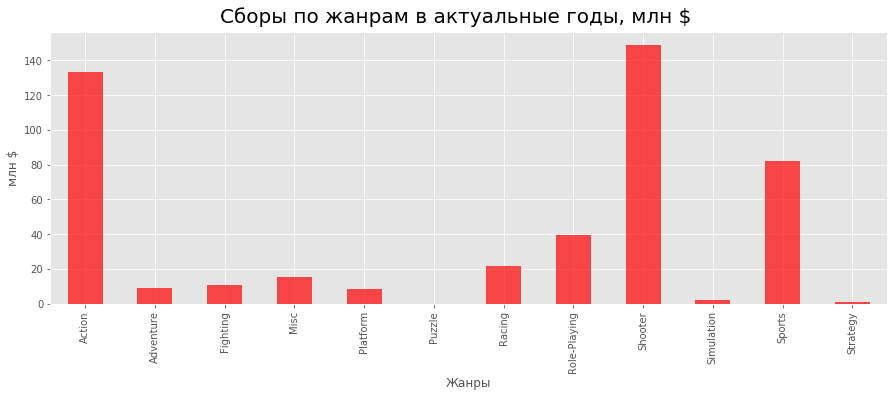

In [86]:
plt.figure(figsize=(15, 5)).suptitle('Сборы по жанрам в актуальные годы, млн $', fontsize=20, y=0.95, x=0.5)
actual_data.query('platform=="PS4" | platform=="XOne"').groupby('genre')['total_profit'].sum().plot(kind='bar', alpha=0.7, color='red')
plt.xlabel('Жанры')
plt.ylabel('млн $')